# Training an AI to Recognize Handwritten Digits

## Imports

In [1]:
import magnet.nodes as mn

from magnet.data import Data
from magnet.training import SupervisedTrainer, callbacks
from magnet.utils import summarize

Accelerating your code on a shiney new Tesla P100-PCIE-16GB .


In [2]:
from mnist_quickstart import *

## Load the MNIST Dataset

MagNet's Data class is an abstraction over the training sets and uses MagNet's DataLoaders, Sampler and collate functions.

In [4]:
# Load the MNIST Dataset using the simple get() method
data = Data.get('mnist')

This is what the digits look like

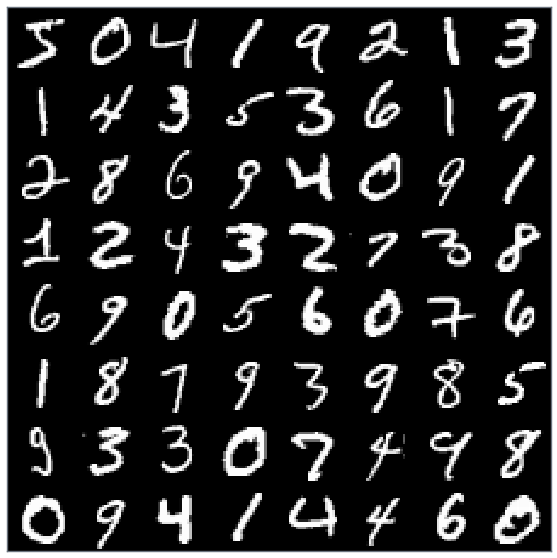

In [5]:
x, y = next(data(batch_size=64))
show_images(x)

## Define Lienar Node

Define a simple Linear classifier using a Linear ``Node``.

Nodes are at MagNet's heart.
<br><br>
They are _self-aware_ modules.
<br><br>
They react to the computational graph and change their properties accordingly

In [6]:
# Note that the activation has to be explicitly disabled.
# The default is ReLU.
model = mn.Linear(10, act=None)

In [7]:
model
# The model is not yet built.
# Makes sense since we don't know the input dimensionality yet

Linear()

MagNet automatically builds Nodes just in time.

Let's summarize the model

In [8]:
summarize(model, x) # x is the input to the model

+--------+-----------+----------------------+
|  Node  |   Shape   | Trainable Parameters |
+--------+-----------+----------------------+
| input  | 1, 28, 28 |          0           |
+--------+-----------+----------------------+
| Linear |    10     |        7,850         |
+--------+-----------+----------------------+
Total Trainable Parameters: 7,850


We will ask the model to sort digits into respective buckets.

The first column represents $0$, the second $1$ and so on...

All the digits in the first column are what the model thinks is $0$.

The correct results are in black and the wrong ones are in white.

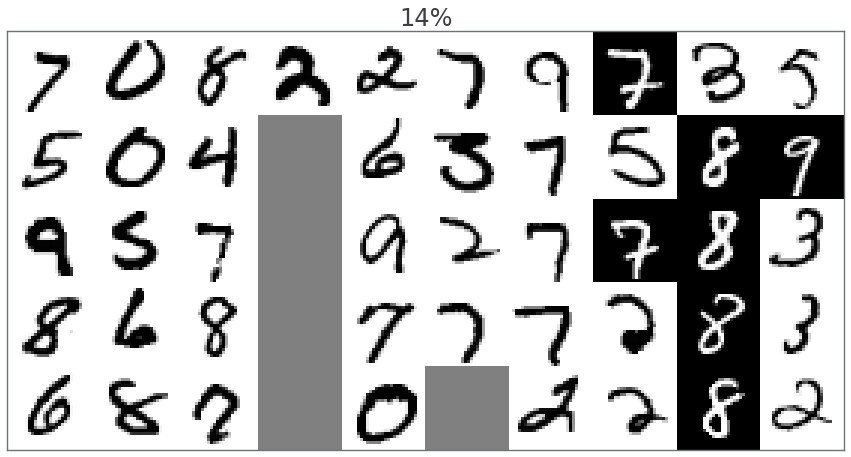

In [9]:
order(model, data)

## Train the Model

Since this is a [supervised learning](https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms) problem, we will use the simple ``SupervisedTrainer`` class.

In [10]:
# Track the accuracy of classification as well
trainer = SupervisedTrainer(model, metrics='accuracy')

Callbacks breathe life into MagNet's training process.

Callbacks allow you to add additional features to the trainer.

In [11]:
# This callback tracks metrics (loss, accuracy) on a held-out validation set
validate_callback = callbacks.Validate(data(batch_size=64, mode='val'),
                                       SupervisedTrainer.validate)

# This callback logs the metrics and adds a nice progress bar
monitor_callback = callbacks.Monitor()

Train for an epoch with batch size $64$

In [12]:
trainer.train(data(batch_size=64, shuffle=True),
              callbacks=[validate_callback, monitor_callback])

Take a look at the Monitor callback to see how training went

/home/vaisakh/magnet/magnet/utils/statistical.py:122: RuntimeWarning: window_fraction (0.3) too low for order (3) and length (9) of data
Returning raw data
  RuntimeWarning)


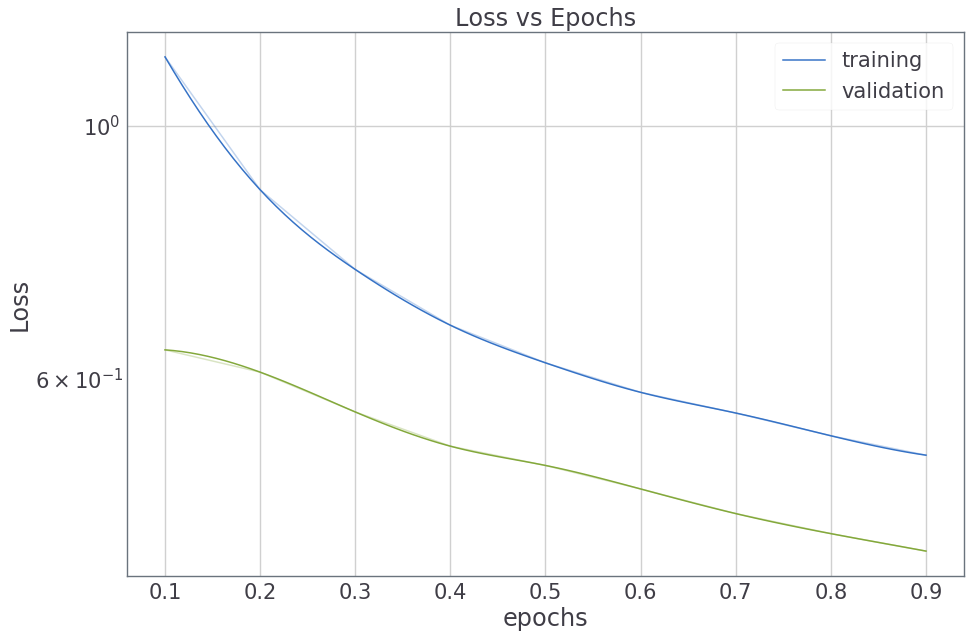

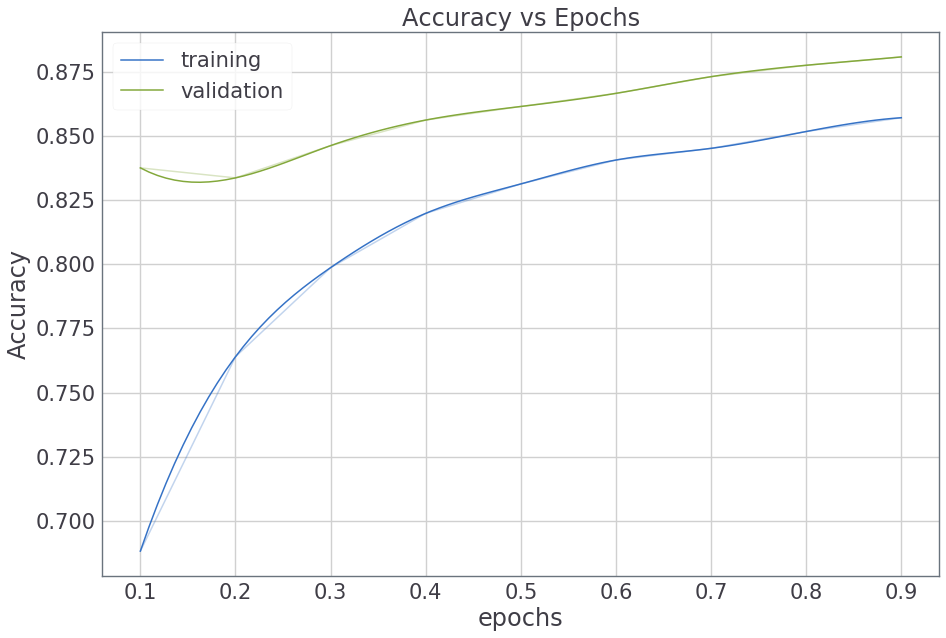

In [13]:
monitor_callback

## Test the Model's Performance

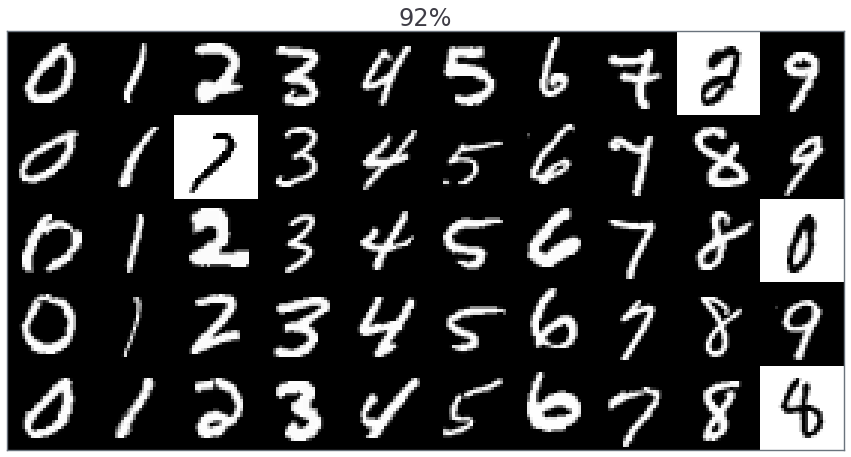

In [14]:
model.eval()
order(model, data)
# Pretty-good for a second of training!

Take a look inside the model's _mind_ (it's weights)

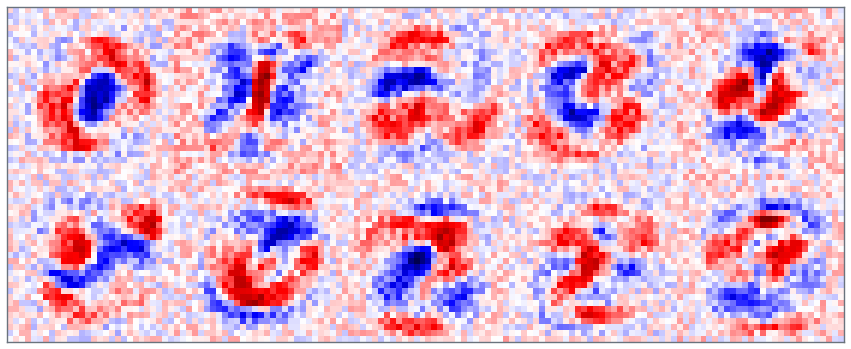

In [15]:
visualize_weights(model)